Atividade 2 TÓPICOS COMPUTACIONAIS EM CIÊNCIA DE DADOS - Ciências da Computação
Bernardo Gontijo Vaz Guimarães
Dados escolhidos UNSW_NB15

In [1]:
# Importando as bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import seaborn as sns

#Análise de correlação entre cat
from scipy.stats import chi2_contingency

# Preproc, normalização
from sklearn.preprocessing import StandardScaler

#Dividir dataset entre teste e reino
from sklearn.model_selection import train_test_split

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Avaliação dos modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Redução de dimensionalidade
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Carregando os dados a serem utilizados

In [2]:
# Carregando a lista de Features
features = pd.read_csv('csv_files/NUSW-NB15_features.csv',
                       encoding_errors='ignore',
                       index_col='No.'
                      )

In [3]:
# Informações das colunas do Dataset
#print(features)

In [4]:
# Lista para ser usada como header dos dados
header = list(features['Name'])
header

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [5]:
# Selecionando colunas a serem usadas
columns = [
     'proto',
     'state',
     'dur',
     'sbytes',
     'dbytes',
     'sttl',
     'dttl',
     'sloss',
     'dloss',
     'service',
     'Sload',
     'Dload',
     'Spkts',
     'Dpkts',
     'smeansz',
     'dmeansz',
     'Sjit',
     'Djit',
     'tcprtt',
     'synack',
     'ackdat',
     'ct_state_ttl',
     'ct_srv_src',
     'ct_srv_dst',
     'ct_src_dport_ltm',
     'ct_dst_sport_ltm',
     'ct_dst_src_ltm',
     'attack_cat',
     'Label'
    ]

**Colunas não usadas:** <br>
srcip e dstip -> outros atributos já trabalham as relações entre a origem e o destino <br>
stime e ltime -> colunas dur já trabalha o tratamento de tempo necessário <br>
ct_flw_http_mthd -> mais de 50% dos valores faltantes <br>
dsport -> outros atributos já trabalham as relações entre a origem e o destino <br>
Atributos abaixo foram retirados por conta de baixa correlação com labels <br>
swin e dwin <br>
stcpb e dtcpb <br>
is_sm_ips_ports <br>
trans_depth <br>
res_bdy_len <br>
ct_ftp_cmd <br>
is_ftp_login <br>
ct_dst_ltm <br>
ct_src_ ltm <br>

In [6]:
# Conversores para tratar os dados no carregamento
converter = {
    'is_ftp_login': lambda x: np.int64(1) if x=='1' else np.int64(0),
    'is_sm_ips_ports': lambda x: np.int64(1) if x=='1' else np.int64(0),
    'ct_ftp_cmd': lambda x: np.int64(x) if x != ' ' else np.int64(0)
}

In [7]:
# Definição dos tipos das colunas no carregamento
dtype = {
    'attack_cat': np.str_
}

Carregando os arquivos em 4 processos

In [8]:
data1 = pd.read_csv('csv_files/data/UNSW-NB15_1.csv',names=header, usecols=columns, dtype=dtype, converters = converter)

In [9]:
data2 = pd.read_csv('csv_files/data/UNSW-NB15_2.csv',names=header, usecols=columns, dtype=dtype, converters = converter)

In [10]:
data3 = pd.read_csv('csv_files/data/UNSW-NB15_3.csv',names=header, usecols=columns, dtype=dtype, converters = converter)

In [11]:
data4 = pd.read_csv('csv_files/data/UNSW-NB15_4.csv',names=header, usecols=columns, dtype=dtype, converters = converter)

Concatenando os arquivos

In [12]:
data = pd.concat([data1,data2,data3,data4],ignore_index=True)
data.head()
data.shape

(2540047, 29)

In [13]:
# Verificando tipos das colunas e adicionando funções ao converter para consertar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 29 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   sloss             int64  
 8   dloss             int64  
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             int64  
 13  Dpkts             int64  
 14  smeansz           int64  
 15  dmeansz           int64  
 16  Sjit              float64
 17  Djit              float64
 18  tcprtt            float64
 19  synack            float64
 20  ackdat            float64
 21  ct_state_ttl      int64  
 22  ct_srv_src        int64  
 23  ct_srv_dst        int64  
 24  ct_src_dport_ltm  int64  
 25  ct_dst_sport_ltm  int64  
 26  ct_dst_src_ltm

In [14]:
# Verificando a Coluna que possuia valores vazios
#data['ct_ftp_cmd'].unique()

In [15]:
# Contando os NAs nas colunas
for i in range(data.shape[1]):
    print(data.columns[i],data.isna().sum().iloc[i])

proto 0
state 0
dur 0
sbytes 0
dbytes 0
sttl 0
dttl 0
sloss 0
dloss 0
service 0
Sload 0
Dload 0
Spkts 0
Dpkts 0
smeansz 0
dmeansz 0
Sjit 0
Djit 0
tcprtt 0
synack 0
ackdat 0
ct_state_ttl 0
ct_srv_src 0
ct_srv_dst 0
ct_src_dport_ltm 0
ct_dst_sport_ltm 0
ct_dst_src_ltm 0
attack_cat 2218764
Label 0


In [16]:
# Usado para verificar a % de NAs na coluna
#data['ct_flw_http_mthd'].isna().sum()/data.shape[0]

In [17]:
# % de NAs no attack cat
data['attack_cat'].isna().sum()/data.shape[0]

np.float64(0.8735129704292873)

In [18]:
# Pegando as colunas numéricas descritivass
descr_cols = list(data.describe().columns)[:-1] # até -1 para tirar o label

In [19]:
descr_cols

['dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'smeansz',
 'dmeansz',
 'Sjit',
 'Djit',
 'tcprtt',
 'synack',
 'ackdat',
 'ct_state_ttl',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm']

In [20]:
# Verificar relação entre os atributos numéricos e label
data.groupby(['Label'])[descr_cols].mean().iloc[:,0:15]

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,Dpkts,smeansz,dmeansz,Sjit,Djit
Label,,,,,,,,,,,,,,,
0,0.648411,4121.088225,41058.519224,37.100686,28.566358,5.534693,18.393768,2.827846e+07,2.804086e+06,36.797789,48.087476,128.032179,311.460281,1454.165960,801.282377
1,0.730478,5848.631674,4446.658613,240.135647,45.963020,2.603390,2.073325,9.688622e+07,1.150953e+04,9.056246,5.704986,98.159009,36.425198,2520.446978,238.324164


In [21]:
data.groupby(['Label'])[descr_cols].mean().iloc[:,16:30]

,synack,ackdat,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
Label,,,,,,,,
0,0.002081,0.001586,0.034048,7.627581,7.397207,3.362240,2.608133,4.961239
1,0.011620,0.011920,1.829543,20.114295,19.981509,13.481059,10.392299,19.861163


In [22]:
data.groupby(['Label'])[descr_cols].mean().iloc[:,30:-1]

""
Label
0
1


In [23]:
data_mean_label = data.groupby(['Label'])[descr_cols].mean()

Verificação da relação das médias calc na mão

In [24]:
for i in range(len(data_mean_label.columns)):
    relation = (data_mean_label.iloc[:,i][1])/(data_mean_label.iloc[:,i][0])
    print(relation)

1.12656645299003
1.4191959391803253
0.10830051099180006
6.472539298692753
1.6089912714405996
0.47037663704751126
0.11271887178715687
3.4261494318049732
0.004104558253416788
0.2461084392630613
0.11863766618906847
0.7666745186850078
0.116949738427453
1.7332595093868435
0.29742843654821927
6.4196764957620704
5.583729473193418
7.5167125148305995
53.73456138352663
2.6370477125525724
2.701223480052429
4.009546874705317
3.984573753148697
4.003266881833508


In [25]:
for i in range(len(data_mean_label.columns)):
    print(data_mean_label.iloc[:,i][1],data_mean_label.iloc[:,i][0])
    print(data_mean_label.iloc[:,i][1]/data_mean_label.iloc[:,i][0])

0.7304782731268072 0.6484111711191456
1.12656645299003
5848.631673633526 4121.088224795427
1.4191959391803253
4446.658612500506 41058.51922376602
0.10830051099180006
240.13564676624657 37.100685787222076
6.472539298692753
45.96302014112169 28.56635766579952
1.6089912714405996
2.603390157586925 5.534692738840183
0.47037663704751126
2.073324763526237 18.39376788157731
0.11271887178715687
96886215.2921104 28278455.806017935
3.4261494318049732
11509.533950680985 2804085.9064675276
0.004104558253416788
9.056246362241389 36.797788768882135
0.2461084392630613
5.704985946968872 48.08747618043199
0.11863766618906847
98.15900934689978 128.0321791772356
0.7666745186850078
36.425198345383976 311.46028058865204
0.116949738427453
2520.446977721616 1454.1659596105417
1.7332595093868435
238.32416448797787 801.2823765401484
0.29742843654821927
0.023539724878067 0.00366680858351767
6.4196764957620704
0.011619981894466872 0.002081043136178521
5.583729473193418
0.011919742983600127 0.0015857654473391493
7

In [26]:
# Iterar sobre o agrupado e calcular a diferença entre as médias dos marcados como ataque e não marcados para encontrar os que têm diferença maior que 2x
big_mean_diff = list()
for i in range(len(data_mean_label.columns)):
    relation = (data_mean_label.iloc[:,i][1])/(data_mean_label.iloc[:,i][0])
    if relation >= 2 or relation <=0.5: 
        print(data_mean_label.columns[i],relation)
        big_mean_diff.append(data_mean_label.columns[i])
big_mean_diff

dbytes 0.10830051099180006
sttl 6.472539298692753
sloss 0.47037663704751126
dloss 0.11271887178715687
Sload 3.4261494318049732
Dload 0.004104558253416788
Spkts 0.2461084392630613
Dpkts 0.11863766618906847
dmeansz 0.116949738427453
Djit 0.29742843654821927
tcprtt 6.4196764957620704
synack 5.583729473193418
ackdat 7.5167125148305995
ct_state_ttl 53.73456138352663
ct_srv_src 2.6370477125525724
ct_srv_dst 2.701223480052429
ct_src_dport_ltm 4.009546874705317
ct_dst_sport_ltm 3.984573753148697
ct_dst_src_ltm 4.003266881833508


['dbytes',
 'sttl',
 'sloss',
 'dloss',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'dmeansz',
 'Djit',
 'tcprtt',
 'synack',
 'ackdat',
 'ct_state_ttl',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm']

Produzindo uma matriz de correlação para avaliar os atributos com

In [27]:
# Pearson correlation
num_corr = data.corr(numeric_only=True)
num_corr.iloc[:,-1]

dur                 0.001959
sbytes              0.010180
dbytes             -0.075543
sttl                0.904393
dttl                0.134947
sloss              -0.043272
dloss              -0.095855
Sload               0.192278
Dload              -0.219710
Spkts              -0.120880
Dpkts              -0.115947
smeansz            -0.065363
dmeansz            -0.272397
Sjit                0.020959
Djit               -0.054420
tcprtt              0.143109
synack              0.122253
ackdat              0.143443
ct_state_ttl        0.873694
ct_srv_src          0.383007
ct_srv_dst          0.386509
ct_src_dport_ltm    0.396749
ct_dst_sport_ltm    0.419056
ct_dst_src_ltm      0.439916
Label               1.000000
Name: Label, dtype: float64

In [28]:
# Kendall correlation
num_corr = data.corr(numeric_only=True, method='kendall')
num_corr.iloc[:,-1]

dur                -0.258458
sbytes             -0.348955
dbytes             -0.363397
sttl                0.736718
dttl               -0.416054
sloss              -0.280588
dloss              -0.281369
Sload               0.238405
Dload              -0.407619
Spkts              -0.292236
Dpkts              -0.364095
smeansz            -0.236983
dmeansz            -0.381872
Sjit               -0.201351
Djit               -0.233105
tcprtt             -0.180882
synack             -0.180980
ackdat             -0.181152
ct_state_ttl        0.919764
ct_srv_src          0.222227
ct_srv_dst          0.215734
ct_src_dport_ltm    0.378263
ct_dst_sport_ltm    0.458937
ct_dst_src_ltm      0.309146
Label               1.000000
Name: Label, dtype: float64

In [29]:
# Spearman correlation
num_corr = data.corr(numeric_only=True, method='spearman')
num_corr.iloc[:,-1]

dur                -0.315860
sbytes             -0.420797
dbytes             -0.433614
sttl                0.760892
dttl               -0.422565
sloss              -0.312964
dloss              -0.322032
Sload               0.291694
Dload              -0.491303
Spkts              -0.340038
Dpkts              -0.429284
smeansz            -0.283401
dmeansz            -0.455330
Sjit               -0.234670
Djit               -0.273119
tcprtt             -0.209009
synack             -0.209081
ackdat             -0.208811
ct_state_ttl        0.932251
ct_srv_src          0.263057
ct_srv_dst          0.254983
ct_src_dport_ltm    0.407662
ct_dst_sport_ltm    0.484185
ct_dst_src_ltm      0.349463
Label               1.000000
Name: Label, dtype: float64

**Colunas com correlação forte à label em todos os métodos:**<br>
sttl <br>
ct_state_ttl <br>

Investigando a proporção de linha para ataque e para não ataque.

In [30]:
data['Label'].value_counts()

Label
0    2218764
1     321283
Name: count, dtype: int64

In [31]:
# Percentual de linhas de ataque
perc_ataque = data['Label'].value_counts()[1]/data['Label'].value_counts().sum()
perc_normal = data['Label'].value_counts()[0]/data['Label'].value_counts().sum()
print('Percentual de Atq:',perc_ataque)
print('Percentual de Normal:',perc_normal)

Percentual de Atq: 0.12648702957071267
Percentual de Normal: 0.8735129704292873


**Investigando os atributos categóricos:**

In [32]:
# Colunas categóricas
data.select_dtypes(include='object').columns

Index(['proto', 'state', 'service', 'attack_cat'], dtype='object')

In [33]:
# Pegar colunas categóricas
cat_columns = list(data.select_dtypes(include='object').columns)
for coluna in cat_columns:
    print(data[coluna].value_counts())

proto
tcp     1495074
udp      990435
unas      16202
arp       10064
ospf       7798
         ...   
3pc         137
igmp         64
udt           8
rtp           7
esp           2
Name: count, Length: 135, dtype: int64
state
FIN    1478689
CON     560588
INT     490471
REQ       9043
RST        528
ECO        337
CLO        161
URH        108
ACC         43
PAR         30
TST          9
ECR          9
URN          8
no           8
MAS          8
TXD          7
Name: count, dtype: int64
service
-           1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64
attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor     

**Usar o teste de independência de Chi-Square para investigar a relação entre os atributos categóricos**

In [34]:
cat_columns[:-1]

['proto', 'state', 'service']

In [35]:
for coluna in data[cat_columns[:-1]]:
    print(coluna,data[coluna].isna().sum())

proto 0
state 0
service 0


In [36]:
# Criando pares de Labels com as categorias
labels_columns = list()
for coluna in cat_columns[:-1]:
    labels_columns.append(['Label',coluna])
labels_columns

[['Label', 'proto'], ['Label', 'state'], ['Label', 'service']]

In [37]:
data[[*cat_columns[:-1],'Label']]

,proto,state,service,Label
0,udp,CON,dns,0
1,udp,CON,-,0
2,udp,CON,dns,0
3,udp,CON,dns,0
4,udp,CON,dns,0
...,...,...,...,...
2540042,tcp,FIN,ftp-data,0
2540043,tcp,CON,ftp,0
2540044,tcp,CON,ftp,0
2540045,tcp,CON,http,0


In [38]:
# Fatorizando os dados para poder aplicar o método
data_fact = data[[*cat_columns[:-1],'Label']].apply(lambda x : pd.factorize(x)[0])

In [39]:
cols_results = list()
# Loop through each pair
for par in labels_columns:
    col1, col2 = par[0], par[1]
    
    # 1. Create the contingency table
    contingency_table = pd.crosstab(data_fact[col1], data_fact[col2])
    
    # 2. Perform the Chi-Square test using chi2_contingency
    chi, p, dof, expect = chi2_contingency(contingency_table)
    
    # Store the results
    cols_results.append({
        'Col_Label': col1,
        'Col Categorica': col2,
        'Chi-square': chi,
        'p': p
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(cols_results)

# Display the results
print(results_df)

  Col_Label Col Categorica     Chi-square    p
0     Label          proto  449122.969709  0.0
1     Label          state  907673.334961  0.0
2     Label        service  230615.728890  0.0


Forte correlação entre label e as variáveis categóricas

**Pre-processamento: OHE nos dados categóricos**

In [40]:
#One Hot encoding colunas categóricas
ohe_cat_data = pd.get_dummies(
    data[cat_columns[:-1]]
)

In [41]:
ohe_columns = ohe_cat_data.columns
ohe_columns

Index(['proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus',
       'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna',
       ...
       'service_ftp', 'service_ftp-data', 'service_http', 'service_irc',
       'service_pop3', 'service_radius', 'service_smtp', 'service_snmp',
       'service_ssh', 'service_ssl'],
      dtype='object', length=164)

In [42]:
ohe_cat_data.shape

(2540047, 164)

In [43]:
ohe_cat_data.head()

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# concatenando os DFs em um só DF
preproc_data = pd.concat([data[descr_cols],ohe_cat_data],axis=1)
preproc_data

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.001055,132,164,31,29,0,0,500473.937500,621800.937500,2,...,False,False,False,False,False,False,False,False,False,False
1,0.036133,528,304,31,29,0,0,87676.085940,50480.171880,4,...,False,False,False,False,False,False,False,False,False,False
2,0.001119,146,178,31,29,0,0,521894.531300,636282.375000,2,...,False,False,False,False,False,False,False,False,False,False
3,0.001209,132,164,31,29,0,0,436724.562500,542597.187500,2,...,False,False,False,False,False,False,False,False,False,False
4,0.001169,146,178,31,29,0,0,499572.250000,609067.562500,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,0.087306,320,1828,31,29,1,2,24465.671880,146610.765600,6,...,False,True,False,False,False,False,False,False,False,False
2540043,0.365058,456,346,31,29,2,2,8743.816406,6333.240234,8,...,True,False,False,False,False,False,False,False,False,False
2540044,6.335154,1802,2088,31,29,7,9,2204.839844,2549.582764,32,...,True,False,False,False,False,False,False,False,False,False
2540045,2.200934,3498,166054,31,29,2,57,12496.513670,598375.062500,58,...,False,False,True,False,False,False,False,False,False,False


**Dividindo os dados em samples de teste e treino**

In [45]:
#Usando o train test split do scikitlearn com stratify para garantir uma proporção similar de attack e normal
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    preproc_data,
    data['Label'],
    test_size = 0.25,
    stratify = data['Label'],
    random_state=19
)

In [48]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('y_train Shape:',y_train.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (1905035, 188)
X_test Shape: (635012, 188)
y_train Shape: (1905035,)
y_test Shape: (635012,)


In [49]:
print('X_train Head:',X_train.head())
print('X_test Head:',X_test.head())
print('y_train Head:',y_train.head())
print('y_test Head:',y_test.head())

X_train Head:               dur  sbytes   dbytes  sttl  dttl  sloss  dloss         Sload  \
1809470  0.001059     146      178    31    29      0      0  5.514636e+05   
328557   0.019120    2854    29168    31    29      7     17  1.168201e+06   
841376   2.641740   19618  1087890    31    29      2    370  5.924883e+04   
1958201  0.000005     264        0    60     0      0      0  2.112000e+08   
2259848  0.361363     320     1908    31    29      1      2  5.910954e+03   

                Dload  Spkts  ...  service_ftp  service_ftp-data  \
1809470  6.723324e+05      2  ...        False             False   
328557   1.195021e+07     46  ...        False             False   
841376   3.290050e+06    368  ...        False             False   
1958201  0.000000e+00      2  ...        False             False   
2259848  3.697114e+04      6  ...        False              True   

         service_http  service_irc  service_pop3  service_radius  \
1809470         False        False      

In [50]:
#Normalizando os dados com standard scaler
scaler = StandardScaler()

In [51]:
# Fazer o fit dos dados usando a base de treino e depois transformar a base de teste e treino com eles
std_fit_train = scaler.fit(
    X_train[descr_cols]
)

In [52]:
# Normalizar os dados numéricos de teste e criar uma nova tabela concatenando os categoricos com one hot encoding e os dados normalziados
X_test_std_descr = pd.DataFrame(
    std_fit_train.transform(X_test[descr_cols]),
    columns=X_test[descr_cols].columns
)
df_xtest_std = pd.concat([X_test_std_descr,X_test[ohe_columns].reset_index()],axis=1)
print(df_xtest_std.shape)
print(df_xtest_std.head())

(635012, 189)
        dur    sbytes    dbytes      sttl      dttl     sloss     dloss  \
0 -0.049711 -0.073193 -0.226294 -0.037321 -0.718477 -0.231972 -0.288696   
1 -0.037628  0.014880  0.339294 -0.425923 -0.040719  0.082225  0.400033   
2  0.044520  0.157806  3.175028 -0.425923 -0.040719  0.710620  3.190267   
3 -0.048998 -0.037928 -0.131764 -0.425923 -0.040719  0.082225 -0.094439   
4 -0.049627 -0.075310 -0.225189 -0.425923 -0.040719 -0.231972 -0.288696   

      Sload     Dload     Spkts  ...  service_ftp  service_ftp-data  \
0  2.649008 -0.579892 -0.411627  ...        False             False   
1 -0.309062  0.492747  0.745126  ...        False             False   
2 -0.310515  0.254439  2.559126  ...        False             False   
3 -0.295737  2.402591  0.009011  ...        False             False   
4 -0.306792 -0.427787 -0.411627  ...        False             False   

   service_http  service_irc  service_pop3  service_radius  service_smtp  \
0         False        False    

In [53]:
X_test[ohe_columns].shape

(635012, 164)

In [54]:
# Normalizar os dados numéricos de treino e criar uma nova tabela concatenando os categoricos com one hot encoding e os dados normalziados
X_train_std_descr = pd.DataFrame(
    std_fit_train.transform(X_train[descr_cols]),
    columns=list(X_train[descr_cols].columns)
)
df_xtrain_std = pd.concat([X_train_std_descr,X_train[ohe_columns].reset_index()],axis=1)
print(df_xtrain_std.shape)
print(df_xtrain_std.head())

(1905035, 189)
        dur    sbytes    dbytes      sttl      dttl     sloss     dloss  \
0 -0.049631 -0.075310 -0.225189 -0.425923 -0.040719 -0.231972 -0.288696   
1 -0.048260 -0.026735 -0.045325 -0.425923 -0.040719  0.082225  0.011519   
2  0.150814  0.273969  6.523352 -0.425923 -0.040719 -0.142202  6.245396   
3 -0.049711 -0.073193 -0.226294 -0.037321 -0.718477 -0.231972 -0.288696   
4 -0.022282 -0.072189 -0.214456 -0.425923 -0.040719 -0.187087 -0.253377   

      Sload     Dload     Spkts  ...  service_ftp  service_ftp-data  \
0 -0.306587 -0.420749 -0.411627  ...        False             False   
1 -0.301400  2.248758  0.166750  ...        False             False   
2 -0.310726  0.198872  4.399415  ...        False             False   
3  1.464915 -0.579892 -0.411627  ...        False             False   
4 -0.311175 -0.571141 -0.359047  ...        False              True   

   service_http  service_irc  service_pop3  service_radius  service_smtp  \
0         False        False   

**Rodar o modelo mais simples de regressão logística para ter uma base de resultados**

In [82]:
# Inicializa o construtor
log_ref = LogisticRegression(random_state=19).fit(df_xtrain_std,y_train)

/Users/bernardogontijovazguimaraes/Documents/Pessoal/jupyterlab_env/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
# Prediçao na base teste
log_ref_predict = log_ref.predict(df_xtest_std)

In [84]:
# Cálculo do score
log_ref.score(df_xtest_std,y_test)

0.9752256650268026

***Análise da Regressão Logística***

In [85]:
print(confusion_matrix(log_ref_predict,y_test))

[[544683   5724]
 [ 10008  74597]]


In [86]:
print(classification_report(log_ref_predict,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    550407
           1       0.93      0.88      0.90     84605

    accuracy                           0.98    635012
   macro avg       0.96      0.94      0.95    635012
weighted avg       0.97      0.98      0.97    635012



In [87]:
# Avaliando as features mais importantes
coef = pd.DataFrame(log_ref.coef_,columns=df_xtest_std.columns)
coef.T.sort_values(0,ascending=False)

,0
sttl,1.245037
ct_state_ttl,1.202790
dttl,0.437367
ct_dst_src_ltm,0.242128
ackdat,0.236579
...,...
Dload,-0.220361
dmeansz,-0.241309
service_-,-0.283032
state_FIN,-0.354344


**Testando Gradient Boost**

In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators=100,
                                        learning_rate=0.1,
                                        max_depth=3,
                                        random_state=0
                                       ).fit(df_xtrain_std,y_train)

In [ ]:
grad_boost_predict = grad_boost.predict(df_xtest_std)

In [ ]:
grad_boost.score(df_xtest_std,y_test)

In [ ]:
confusion_matrix(grad_boost_predict,y_test)

In [ ]:
print(classification_report(y_test,grad_boost_predict))

In [ ]:
feat_gb = pd.DataFrame(grad_boost.feature_importances_).T
feat_gb.columns = df_xtest_std.columns
feat_gb.T.sort_values(0,ascending=False)

**Testando SVC**

In [63]:
svc = SVC().fit(df_xtrain_std,y_train)

In [64]:
svc_predict = svc.predict(df_xtest_std)

In [65]:
svc.score(df_xtest_std,y_test)

0.999985827039489

In [66]:
confusion_matrix(svc_predict,y_test)

array([[554686,      4],
       [     5,  80317]])

In [67]:
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    554691
           1       1.00      1.00      1.00     80321

    accuracy                           1.00    635012
   macro avg       1.00      1.00      1.00    635012
weighted avg       1.00      1.00      1.00    635012



**Redução de dimensionalidade**

***Redução usando PCA***

In [55]:
pca = PCA(n_components=2)
fit_pca = pca.fit_transform(preproc_data)

In [58]:
df_pca = pd.DataFrame(fit_pca, columns=['PC1','PC2'])
df_pca_labeled = pd.concat([df_pca,data['Label']],axis=1)
print(df_pca_labeled)

                  PC1           PC2  Label
0       -3.644387e+07 -2.056146e+06      0
1       -3.685311e+07 -2.630024e+06      0
2       -3.642254e+07 -2.041532e+06      0
3       -3.650713e+07 -2.135745e+06      0
4       -3.644470e+07 -2.068885e+06      0
...               ...           ...    ...
2540042 -3.691691e+07 -2.534285e+06      0
2540043 -3.693176e+07 -2.674662e+06      0
2540044 -3.693828e+07 -2.678484e+06      0
2540045 -3.693171e+07 -2.082144e+06      0
2540046 -3.693603e+07 -2.675761e+06      1

[2540047 rows x 3 columns]


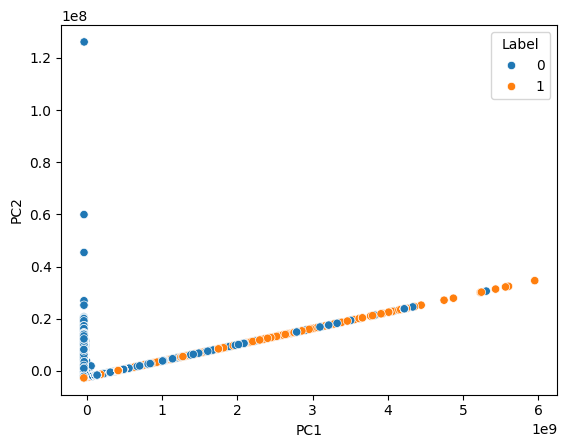

In [60]:
sns.scatterplot(
    data=df_pca_labeled,
    x='PC1',
    y='PC2',
    hue='Label'
);

***Redução por tSNE***

In [ ]:
fit_tsne = TSNE(n_components=2, 
                  learning_rate='auto',
                  init='random',
                  perplexity=3
                 ).fit_transform(preproc_data)

In [ ]:
df_fit_tsne = pd.DataFrame(fit_tsne, columns=['T1','T2'])
df_fit_tsne_labeled = pd.concat([df_pca,data['Label']],axis=1)
df_fit_tsne_labeled

In [ ]:
sns.scatterplot(
    data=df_fit_tsne_labeled,
    x='T1',
    y='T2',
    hue='label'
);